In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [5]:
df = pd.read_excel('Analyst_Test_Sample Data.xlsx')

In [6]:
df
df.fillna(0)

,Call_ID,Date,Time,Agent,Call_Type,Contract_No,Selling_Dealer,Servicing_Dealer,Claim_Type,Miles_Since_Purchase,Contract_Type,Vehicle_Make,Claim_Amount,Claim_Decision,Claim_Decision_Date,Talk_Time_Mins,Hold_time_Mins,Handle_Time_Mins,After_Call_Work_Mins,Agent_Score
0,1868,2021-09-18,17:02:22.091000,Matthew Carter,Service,6342433563,20,20,Transmission,9324,Used,Hyundai,9998,Approved,2021-10-02,30,6,36,22,4 - Good
1,1871,2021-04-30,11:39:28.623000,Carter Perez,Service,2933157624,6,2,Transmission,67232,Used,Hyundai,9997,Approved,2021-07-16,8,15,23,21,3 - Average
2,2635,2022-10-30,15:47:03.623000,Ethan Wilson,Service,7584272746,12,8,Tires,38996,Used,Hyundai,9993,Denied,2022-12-31,2,1,3,19,3 - Average
3,263,2020-09-07,16:25:03.319000,Henry King,Warranty,5684667715,9,6,Engine,34218,Used,Kia,9991,Approved,2020-09-23,8,1,9,11,5 - Great
4,1511,2021-09-26,12:10:33.334000,Aubrey Edwards,Service,1997363374,1,12,Suspension,68642,Used,Toyota,9991,Approved,2022-02-19,10,4,14,25,1 - Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4884,2022-12-04,19:13:57.982000,Lily Adams,Warranty,4559926461,20,15,Suspension,9207,Used,Hyundai,106,Approved,2023-01-08,9,5,14,19,3 - Average
4996,4893,2021-08-29,11:51:20.811000,Zoey Green,Service,3524953543,7,19,Engine,53247,Used,BMW,106,Denied,2021-10-21,29,17,46,10,4 - Good
4997,1782,2020-10-26,14:51:13.833000,Liam Johnson,Warranty,9183941223,8,9,Tires,45620,Used,Toyota,105,Denied,2021-03-12,17,5,22,25,1 - Bad
4998,478,2022-03-16,17:29:55.011000,Liam Johnson,Service,2496236121,8,2,Transmission,29769,Used,Hyundai,101,Approved,2022-04-19,29,10,39,3,5 - Great


In [7]:
display(df)

,Call_ID,Date,Time,Agent,Call_Type,Contract_No,Selling_Dealer,Servicing_Dealer,Claim_Type,Miles_Since_Purchase,Contract_Type,Vehicle_Make,Claim_Amount,Claim_Decision,Claim_Decision_Date,Talk_Time_Mins,Hold_time_Mins,Handle_Time_Mins,After_Call_Work_Mins,Agent_Score
0,1868,2021-09-18,17:02:22.091000,Matthew Carter,Service,6342433563,20,20,Transmission,9324,Used,Hyundai,9998,Approved,2021-10-02,30,6,36,22,4 - Good
1,1871,2021-04-30,11:39:28.623000,Carter Perez,Service,2933157624,6,2,Transmission,67232,Used,Hyundai,9997,Approved,2021-07-16,8,15,23,21,3 - Average
2,2635,2022-10-30,15:47:03.623000,Ethan Wilson,Service,7584272746,12,8,Tires,38996,Used,Hyundai,9993,Denied,2022-12-31,2,1,3,19,3 - Average
3,263,2020-09-07,16:25:03.319000,Henry King,Warranty,5684667715,9,6,Engine,34218,Used,Kia,9991,Approved,2020-09-23,8,1,9,11,5 - Great
4,1511,2021-09-26,12:10:33.334000,Aubrey Edwards,Service,1997363374,1,12,Suspension,68642,Used,Toyota,9991,Approved,2022-02-19,10,4,14,25,1 - Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4884,2022-12-04,19:13:57.982000,Lily Adams,Warranty,4559926461,20,15,Suspension,9207,Used,Hyundai,106,Approved,2023-01-08,9,5,14,19,3 - Average
4996,4893,2021-08-29,11:51:20.811000,Zoey Green,Service,3524953543,7,19,Engine,53247,Used,BMW,106,Denied,2021-10-21,29,17,46,10,4 - Good
4997,1782,2020-10-26,14:51:13.833000,Liam Johnson,Warranty,9183941223,8,9,Tires,45620,Used,Toyota,105,Denied,2021-03-12,17,5,22,25,1 - Bad
4998,478,2022-03-16,17:29:55.011000,Liam Johnson,Service,2496236121,8,2,Transmission,29769,Used,Hyundai,101,Approved,2022-04-19,29,10,39,3,5 - Great


In [8]:
df.dtypes

Call_ID                          int64
Date                    datetime64[ns]
Time                            object
Agent                           object
Call_Type                       object
Contract_No                      int64
Selling_Dealer                   int64
Servicing_Dealer                 int64
Claim_Type                      object
Miles_Since_Purchase             int64
Contract_Type                   object
Vehicle_Make                    object
Claim_Amount                     int64
Claim_Decision                  object
Claim_Decision_Date     datetime64[ns]
Talk_Time_Mins                   int64
Hold_time_Mins                   int64
Handle_Time_Mins                 int64
After_Call_Work_Mins             int64
Agent_Score                     object
dtype: object

In [9]:
df.describe(include='all')

,Call_ID,Date,Time,Agent,Call_Type,Contract_No,Selling_Dealer,Servicing_Dealer,Claim_Type,Miles_Since_Purchase,Contract_Type,Vehicle_Make,Claim_Amount,Claim_Decision,Claim_Decision_Date,Talk_Time_Mins,Hold_time_Mins,Handle_Time_Mins,After_Call_Work_Mins,Agent_Score
count,5000.000000,5000,5000,5000,5000,5.000000e+03,5000.000000,5000.000000,5000,5000.000000,5000,5000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000
unique,NaN,1088,5000,50,2,NaN,NaN,NaN,5,NaN,2,5,NaN,2,1169,NaN,NaN,NaN,NaN,5
top,NaN,2021-09-20 00:00:00,17:02:22.091000,Chloe Hill,Warranty,NaN,NaN,NaN,Suspension,NaN,Used,Honda,NaN,Approved,2022-06-01 00:00:00,NaN,NaN,NaN,NaN,3 - Average
freq,NaN,12,1,125,2530,NaN,NaN,NaN,1038,NaN,4664,1042,NaN,2536,15,NaN,NaN,NaN,NaN,1026
first,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-29 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,2500.500000,NaN,NaN,NaN,NaN,5.555596e+09,10.507600,10.606400,NaN,37510.660200,NaN,NaN,5008.253400,NaN,NaN,15.467600,10.646400,26.114000,13.234000,NaN
std,1443.520003,NaN,NaN,NaN,NaN,2.578000e+09,5.779466,5.783647,NaN,21982.641451,NaN,NaN,2860.961173,NaN,NaN,8.596123,5.792968,10.332452,7.158065,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.113958e+09,1.000000,1.000000,NaN,13.000000,NaN,NaN,101.000000,NaN,NaN,1.000000,1.000000,2.000000,1.000000,NaN
25%,1250.750000,NaN,NaN,NaN,NaN,3.363700e+09,5.000000,6.000000,NaN,17943.500000,NaN,NaN,2515.500000,NaN,NaN,8.000000,6.000000,18.000000,7.000000,NaN


In [10]:
df.describe(datetime_is_numeric=True)

,Call_ID,Date,Contract_No,Selling_Dealer,Servicing_Dealer,Miles_Since_Purchase,Claim_Amount,Claim_Decision_Date,Talk_Time_Mins,Hold_time_Mins,Handle_Time_Mins,After_Call_Work_Mins
count,5000.000000,5000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,2021-06-25 12:57:36,5.555596e+09,10.507600,10.606400,37510.660200,5008.253400,2021-09-08 11:44:44.160000,15.467600,10.646400,26.114000,13.234000
min,1.000000,2020-01-01 00:00:00,1.113958e+09,1.000000,1.000000,13.000000,101.000000,2020-01-06 00:00:00,1.000000,1.000000,2.000000,1.000000
25%,1250.750000,2020-09-20 00:00:00,3.363700e+09,5.000000,6.000000,17943.500000,2515.500000,2020-12-05 00:00:00,8.000000,6.000000,18.000000,7.000000
50%,2500.500000,2021-06-23 00:00:00,5.562496e+09,10.000000,11.000000,37639.000000,4966.500000,2021-09-06 00:00:00,15.000000,11.000000,26.000000,13.000000
75%,3750.250000,2022-03-26 00:00:00,7.716565e+09,16.000000,16.000000,56650.250000,7464.000000,2022-06-06 00:00:00,23.000000,16.000000,34.000000,19.000000
max,5000.000000,2022-12-30 00:00:00,9.998792e+09,20.000000,20.000000,74975.000000,9998.000000,2023-05-29 00:00:00,30.000000,20.000000,50.000000,25.000000
std,1443.520003,NaN,2.578000e+09,5.779466,5.783647,21982.641451,2860.961173,NaN,8.596123,5.792968,10.332452,7.158065


In [11]:
df.corr()

,Call_ID,Contract_No,Selling_Dealer,Servicing_Dealer,Miles_Since_Purchase,Claim_Amount,Talk_Time_Mins,Hold_time_Mins,Handle_Time_Mins,After_Call_Work_Mins
Call_ID,1.000000,0.000618,-0.008951,-0.032547,0.021897,-0.012327,0.000413,-0.012183,-0.006487,0.001332
Contract_No,0.000618,1.000000,-0.002587,0.012969,-0.002659,0.014380,-0.005456,-0.011759,-0.011132,0.010097
Selling_Dealer,-0.008951,-0.002587,1.000000,-0.005626,-0.012732,0.020542,0.004857,0.005667,0.007218,0.020348
Servicing_Dealer,-0.032547,0.012969,-0.005626,1.000000,0.021510,-0.016713,0.000009,0.032212,0.018067,0.003549
Miles_Since_Purchase,0.021897,-0.002659,-0.012732,0.021510,1.000000,0.003838,-0.012967,0.023653,0.002473,0.019413
Claim_Amount,-0.012327,0.014380,0.020542,-0.016713,0.003838,1.000000,-0.017423,-0.021580,-0.026594,0.016795
Talk_Time_Mins,0.000413,-0.005456,0.004857,0.000009,-0.012967,-0.017423,1.000000,-0.006951,0.828057,-0.027627
Hold_time_Mins,-0.012183,-0.011759,0.005667,0.032212,0.023653,-0.021580,-0.006951,1.000000,0.554875,0.004625
Handle_Time_Mins,-0.006487,-0.011132,0.007218,0.018067,0.002473,-0.026594,0.828057,0.554875,1.000000,-0.020392
After_Call_Work_Mins,0.001332,0.010097,0.020348,0.003549,0.019413,0.016795,-0.027627,0.004625,-0.020392,1.000000


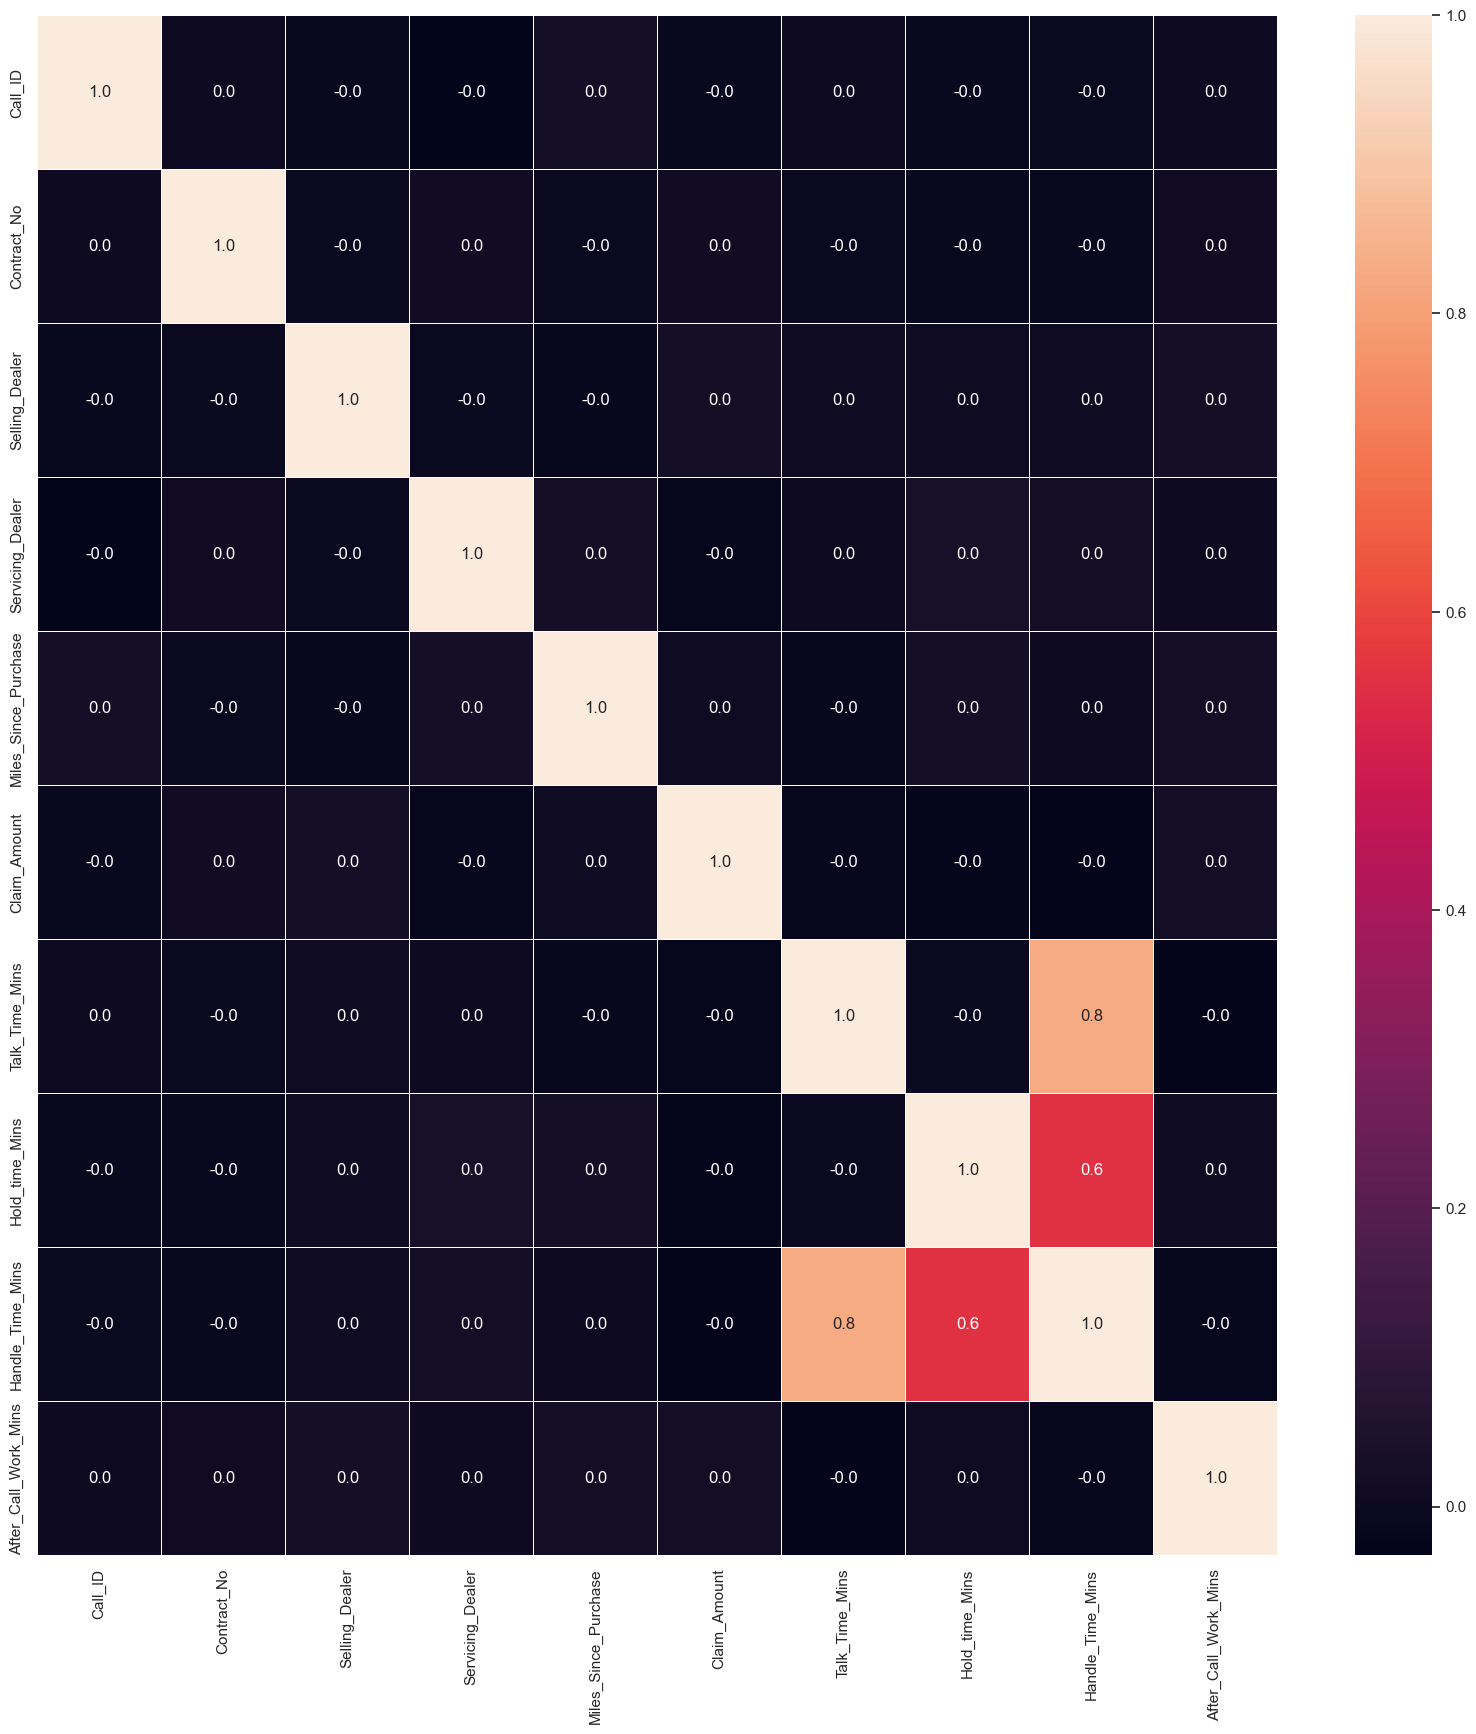

In [12]:
#correlation map
sns.set_theme()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [13]:
print('Information about the data:')
df.info()
print('Shape of the data')
print(df.shape,'\n')

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Call_ID               5000 non-null   int64         
 1   Date                  5000 non-null   datetime64[ns]
 2   Time                  5000 non-null   object        
 3   Agent                 5000 non-null   object        
 4   Call_Type             5000 non-null   object        
 5   Contract_No           5000 non-null   int64         
 6   Selling_Dealer        5000 non-null   int64         
 7   Servicing_Dealer      5000 non-null   int64         
 8   Claim_Type            5000 non-null   object        
 9   Miles_Since_Purchase  5000 non-null   int64         
 10  Contract_Type         5000 non-null   object        
 11  Vehicle_Make          5000 non-null   object        
 12  Claim_Amount          5000 non-null   int64     

In [14]:
df = df.dropna()  
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Call_ID               5000 non-null   int64         
 1   Date                  5000 non-null   datetime64[ns]
 2   Time                  5000 non-null   object        
 3   Agent                 5000 non-null   object        
 4   Call_Type             5000 non-null   object        
 5   Contract_No           5000 non-null   int64         
 6   Selling_Dealer        5000 non-null   int64         
 7   Servicing_Dealer      5000 non-null   int64         
 8   Claim_Type            5000 non-null   object        
 9   Miles_Since_Purchase  5000 non-null   int64         
 10  Contract_Type         5000 non-null   object        
 11  Vehicle_Make          5000 non-null   object        
 12  Claim_Amount          5000 non-null   int64         
 13  Claim_Decision    

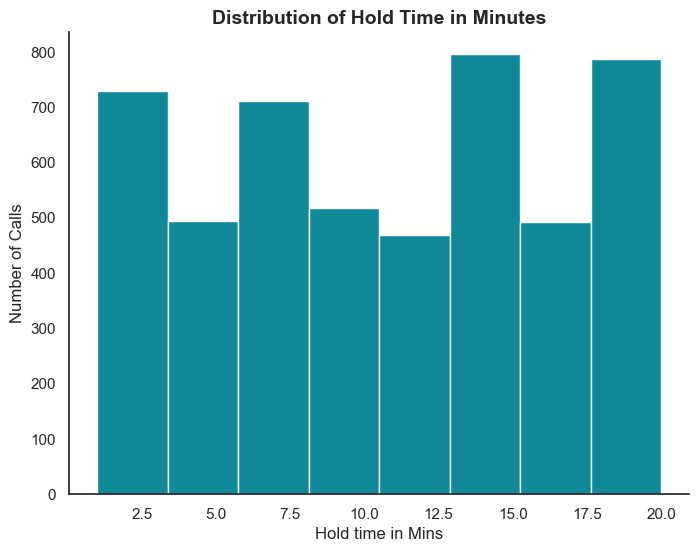

In [15]:
sns.set_style("white")
plt.figure(figsize = (8, 6))
plt.hist(df["Hold_time_Mins"],
         bins = 8, 
         color = "#108A99")
plt.title("Distribution of Hold Time in Minutes", fontsize = 14, weight = "bold")
plt.xlabel("Hold time in Mins")
plt.ylabel("Number of Calls")
sns.despine()
plt.show()


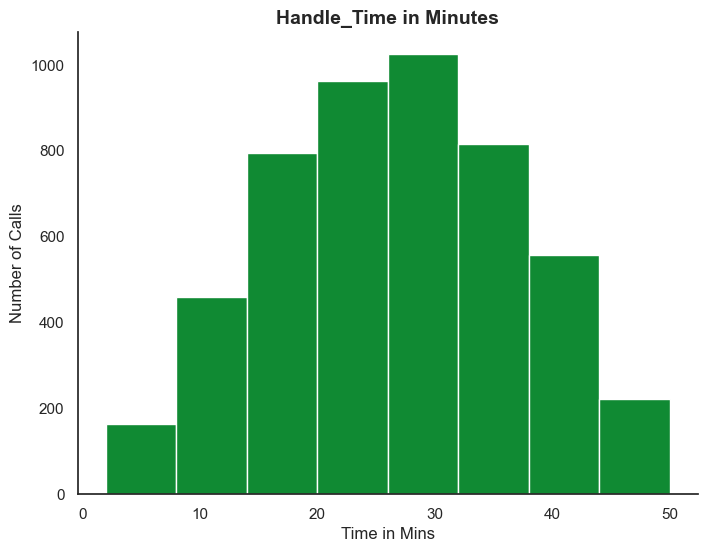

In [16]:
sns.set_style("white")
plt.figure(figsize = (8, 6))
plt.hist(df["Handle_Time_Mins"],
         bins = 8, 
         color = "#108A33")
plt.title("Handle_Time in Minutes", fontsize = 14, weight = "bold")
plt.xlabel("Time in Mins")
plt.ylabel("Number of Calls")
sns.despine()
plt.show()

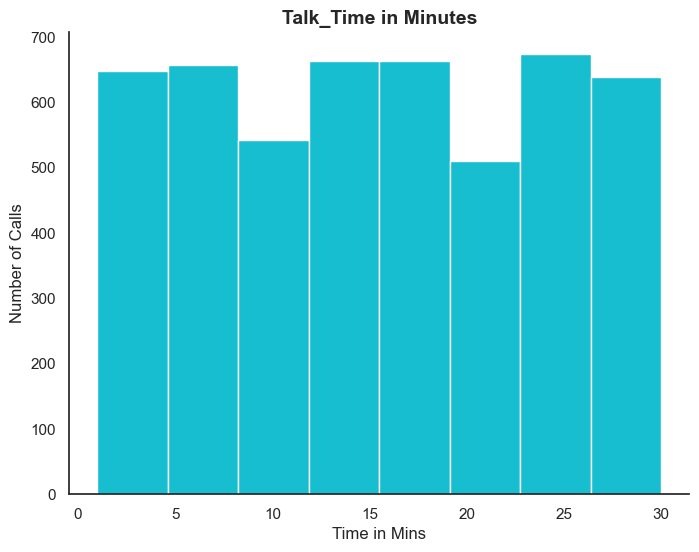

In [17]:
plt.figure(figsize = (8, 6))
plt.hist(df["Talk_Time_Mins"],
         bins = 8, 
         color = "#17becf")
plt.title("Talk_Time in Minutes", fontsize = 14, weight = "bold")
plt.xlabel("Time in Mins")
plt.ylabel("Number of Calls")
sns.despine()
plt.show()
#sns.boxplot(data=titanic, x="age", y="class")

#df[column_to_convert] = pd.to_numeric(df[column_to_convert], errors='coerce')


<Axes: xlabel='Talk_Time_Mins'>

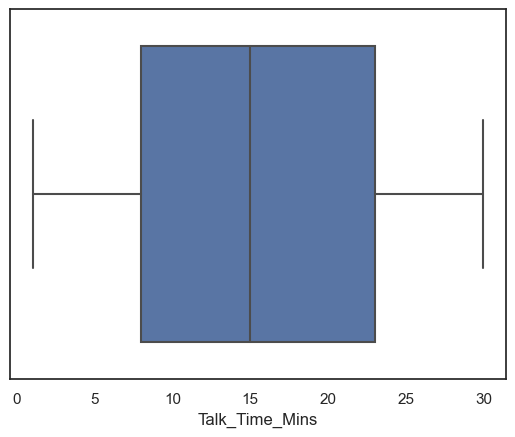

In [18]:
sns.boxplot(x=df['Talk_Time_Mins'])

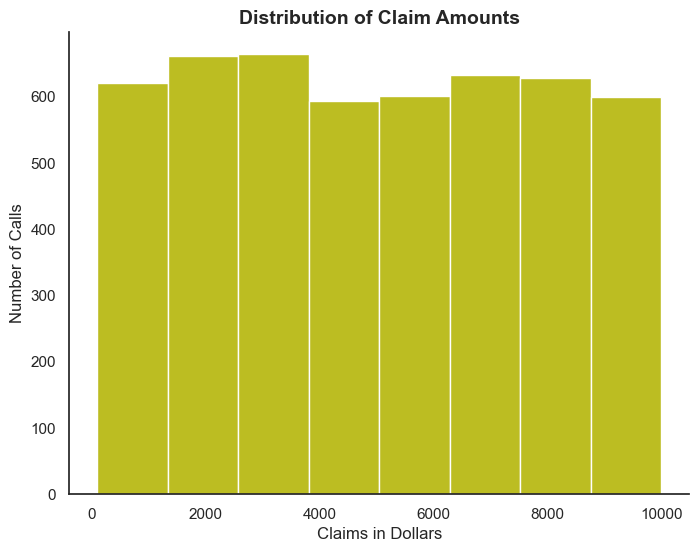

In [19]:
sns.set_style("white")
plt.figure(figsize = (8, 6))
plt.hist(df["Claim_Amount"],
         bins = 8, 
         color = "#bcbd22")
plt.title("Distribution of Claim Amounts", fontsize = 14, weight = "bold")
plt.xlabel("Claims in Dollars")
plt.ylabel("Number of Calls")
sns.despine()
plt.show()

<Axes: xlabel='Claim_Amount'>

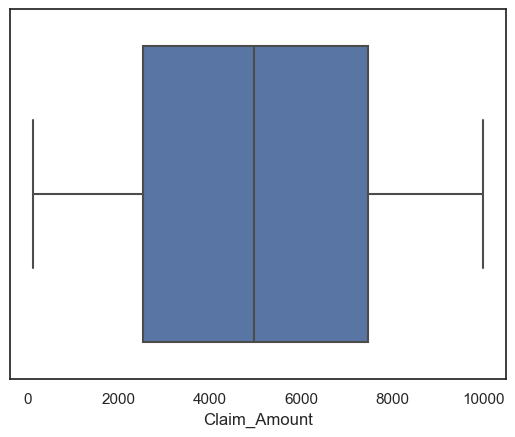

In [20]:
sns.boxplot(x=df['Claim_Amount'])

In [21]:
display(df)

,Call_ID,Date,Time,Agent,Call_Type,Contract_No,Selling_Dealer,Servicing_Dealer,Claim_Type,Miles_Since_Purchase,Contract_Type,Vehicle_Make,Claim_Amount,Claim_Decision,Claim_Decision_Date,Talk_Time_Mins,Hold_time_Mins,Handle_Time_Mins,After_Call_Work_Mins,Agent_Score
0,1868,2021-09-18,17:02:22.091000,Matthew Carter,Service,6342433563,20,20,Transmission,9324,Used,Hyundai,9998,Approved,2021-10-02,30,6,36,22,4 - Good
1,1871,2021-04-30,11:39:28.623000,Carter Perez,Service,2933157624,6,2,Transmission,67232,Used,Hyundai,9997,Approved,2021-07-16,8,15,23,21,3 - Average
2,2635,2022-10-30,15:47:03.623000,Ethan Wilson,Service,7584272746,12,8,Tires,38996,Used,Hyundai,9993,Denied,2022-12-31,2,1,3,19,3 - Average
3,263,2020-09-07,16:25:03.319000,Henry King,Warranty,5684667715,9,6,Engine,34218,Used,Kia,9991,Approved,2020-09-23,8,1,9,11,5 - Great
4,1511,2021-09-26,12:10:33.334000,Aubrey Edwards,Service,1997363374,1,12,Suspension,68642,Used,Toyota,9991,Approved,2022-02-19,10,4,14,25,1 - Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4884,2022-12-04,19:13:57.982000,Lily Adams,Warranty,4559926461,20,15,Suspension,9207,Used,Hyundai,106,Approved,2023-01-08,9,5,14,19,3 - Average
4996,4893,2021-08-29,11:51:20.811000,Zoey Green,Service,3524953543,7,19,Engine,53247,Used,BMW,106,Denied,2021-10-21,29,17,46,10,4 - Good
4997,1782,2020-10-26,14:51:13.833000,Liam Johnson,Warranty,9183941223,8,9,Tires,45620,Used,Toyota,105,Denied,2021-03-12,17,5,22,25,1 - Bad
4998,478,2022-03-16,17:29:55.011000,Liam Johnson,Service,2496236121,8,2,Transmission,29769,Used,Hyundai,101,Approved,2022-04-19,29,10,39,3,5 - Great


<BarContainer object of 2 artists>

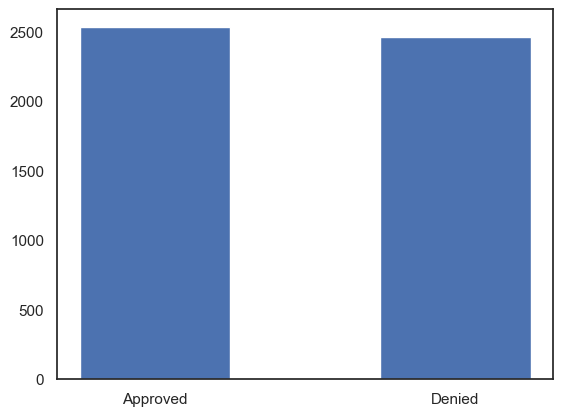

In [22]:
import matplotlib.pyplot as plt
categories = df['Claim_Decision'].value_counts().index
counts = df['Claim_Decision'].value_counts().values
plt.bar(categories, counts, width=0.5)

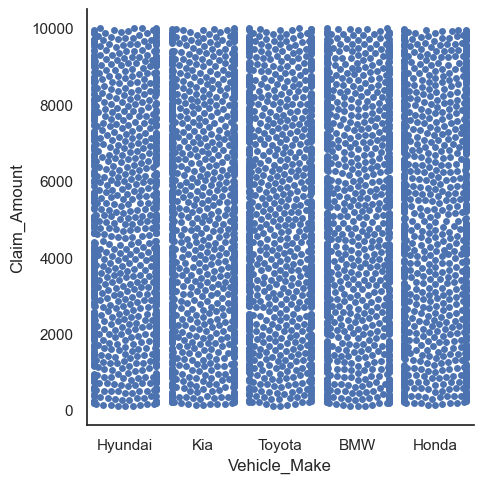

In [23]:
sns.catplot(data=df,x="Vehicle_Make", y="Claim_Amount",  kind="swarm")

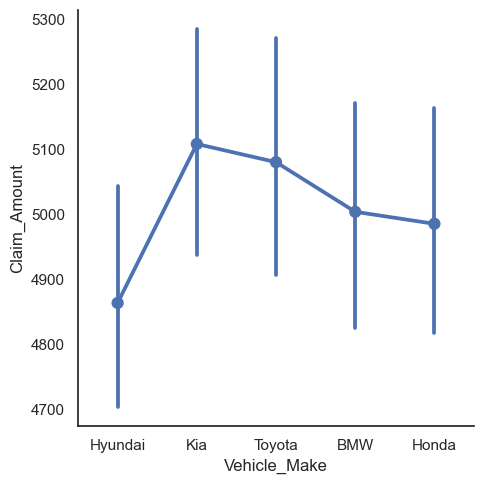

In [24]:
sns.catplot(data=df,x="Vehicle_Make", y="Claim_Amount", kind="point")

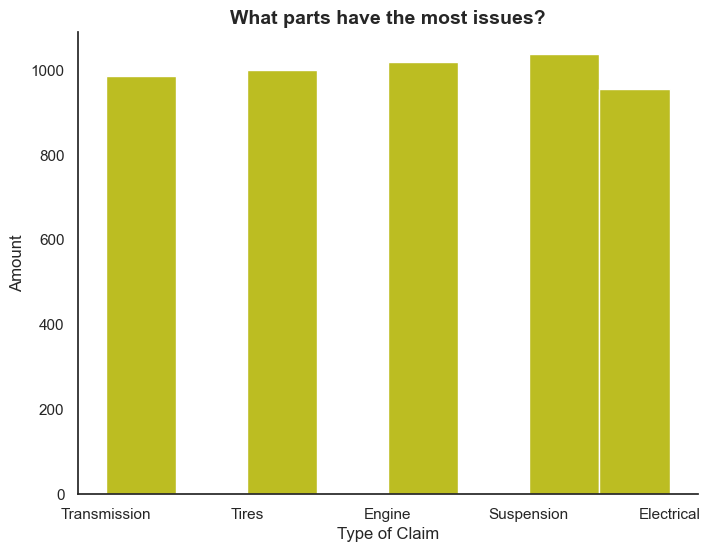

In [25]:
sns.set_style("white")
plt.figure(figsize = (8, 6))
plt.hist(df["Claim_Type"],
         bins = 8, 
         color = "#bcbd22")
plt.title("What parts have the most issues?", fontsize = 14, weight = "bold")
plt.xlabel("Type of Claim")
plt.ylabel("Amount")
sns.despine()
plt.show()

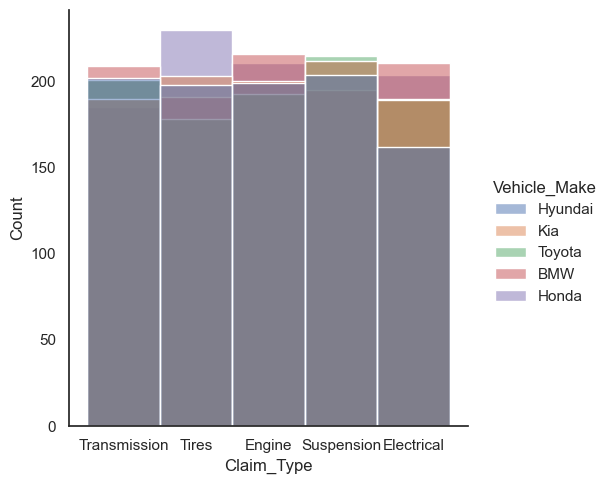

In [26]:
sns.displot(data=df, x="Claim_Type", hue="Vehicle_Make")

<Axes: xlabel='Date,Time'>

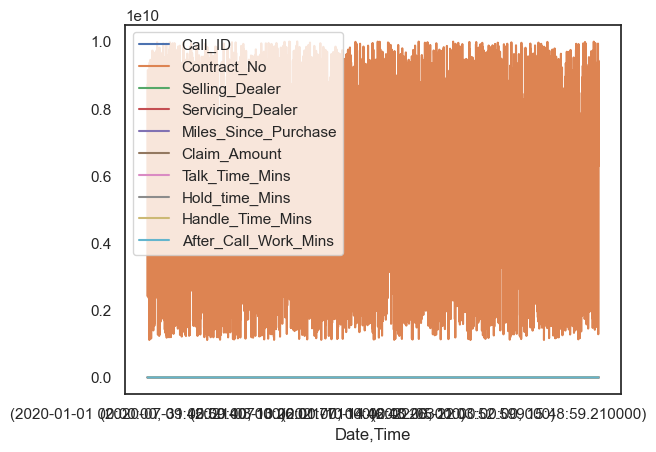

In [27]:
grouped_df = df.groupby(['Date', 'Time'])
mean_df = grouped_df.mean()
mean_df.plot.line()

In [35]:
df['Anomalies'] = df['Claim_Amount'] > df['Claim_Amount'].mean() + 3*df['Claim_Amount'].std() 

In [40]:
df.loc[:,"Anomalies"]

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: Anomalies, Length: 5000, dtype: bool

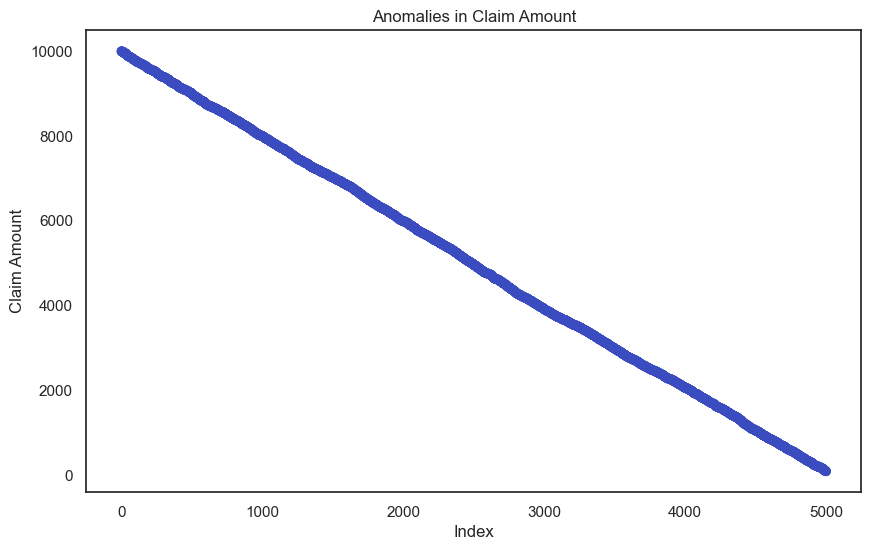

In [36]:
plt.figure(figsize=(10,6)) 
plt.scatter(df.index, df['Claim_Amount'], c=df['Anomalies'], cmap='coolwarm') 
plt.xlabel('Index') 
plt.ylabel('Claim Amount') 
plt.title('Anomalies in Claim Amount') 
plt.show()

In [30]:
#pip install -U scikit-learn
from sklearn import linear_model


df['Date'] = pd.to_numeric(df['Date']) 
model = linear_model.LinearRegression()
model.fit(df[['Date']], df['Handle_Time_Mins'])


LinearRegression()

In [33]:
print(model.coef_) 

[6.23417253e-18]


In [34]:
predicted_handle_time = model.predict([[1631923200000000000]]) 
print(predicted_handle_time)

[26.1594929]
